# **Reading the Dataset**

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the Dataset
BostonCalendar = pd.read_csv("Boston/calendar.csv")
BostonListings = pd.read_csv("Boston/listings.csv")
BostonReviews = pd.read_csv("Boston/reviews.csv")

# Understanding the dataset and the columns

In [3]:
print (BostonCalendar.head())

   listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN


In [4]:
print (BostonReviews.head())

   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  


In [5]:
print (BostonListings.head())

         id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a 

In [6]:
BostonReviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [7]:
BostonCalendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [8]:
BostonListings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
BostonReviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [10]:
BostonCalendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

In [11]:
# Trying to check if there is any bias in the reviews due to missing URL's
BostonListings['listing_url'].isnull().sum()

0

In [12]:
# Sorting the listings according to number of reviews to observe th emost popular lisitings.
x = BostonListings[['id','number_of_reviews']].sort_values(by = ['number_of_reviews'],ascending = False)

In [13]:
x.head()

,id,number_of_reviews
414,66288,404
1637,1497879,320
1460,414419,312
2809,31796,291
679,815639,281


## From the table given above we can observe some of most popular lisitings in Boston having the maximum reviews

# __Identifying the most expensive zipcodes__

In [14]:
df_1 = BostonListings[['zipcode','id']].copy()

In [15]:
df_2 = BostonCalendar[['listing_id','price']].copy()

In [16]:
df_2.dropna(axis = 0,inplace = True)

In [17]:
# Formatting the price to be used a float instead of object
df_2['price'] = df_2['price'].apply(lambda x: float(x.replace(",","").strip('$')))

In [18]:
#Calculating the maximum price of a listing in a year 
df_3 = df_2.groupby(by = 'listing_id').max()

In [19]:
#Calculating the average price of a listing in a year 
df_4 = df_2.groupby(by = 'listing_id').mean()

In [20]:
df_merge = df_3.join(df_4 ,on = 'listing_id',lsuffix = "max",rsuffix = "mean")

In [21]:
df_merge.head()

,pricemax,pricemean
listing_id,,
3353,36.0,35.204819
5506,275.0,147.267442
6695,325.0,197.407407
6976,65.0,65.000000
8792,154.0,154.000000


In [22]:
df_1.dropna(subset = ['zipcode'], axis = 0,inplace = True)

In [23]:
df_1.columns = ['zipcode','listing_id']

In [24]:
# Adding the zip codes of each listing
df_comp = df_1.merge(df_merge,on = 'listing_id')

In [25]:
df_comp.head()

,zipcode,listing_id,pricemax,pricemean
0,02131,3075044,75.0,67.813370
1,02131,6976,65.0,65.000000
2,02131,7651065,79.0,79.000000
3,02131,12386020,75.0,75.000000
4,02131,5706985,200.0,111.755814


In [26]:
df_comp.sort_values(by = ['zipcode'],inplace = True)

In [27]:
df_comp.drop(columns = ['listing_id'],axis =1,inplace = True)

In [28]:
df_comp.head()

,zipcode,pricemax,pricemean
1627,02108,299.0,151.307692
1596,02108,1203.0,344.589506
1717,02108,175.0,163.741722
1752,02108,120.0,104.983051
575,02108,189.0,166.555556


In [29]:
#Calculating the average prices of any zip code
df_avg_mean = df_comp.groupby(by = ['zipcode']).mean()

In [30]:
#Calculating the number of listings in each zip code
df_avg_count = df_comp.groupby(by = ['zipcode']).count()

In [31]:
df_avg = df_avg_mean.join(df_avg_count, on = 'zipcode',rsuffix = "count")

In [32]:
df_avg.head()

,pricemax,pricemean,pricemaxcount,pricemeancount
zipcode,,,,
02108,354.079365,243.820391,63,63
02108 02111,599.000000,357.576271,1,1
02109,444.971429,270.739546,35,35
02110,457.166667,316.893055,12,12
02111,376.879518,290.121468,83,83


In [33]:

df_avg_sorted = df_avg.sort_values(by = ['pricemax','pricemean'],ascending = False)

In [34]:
df_avg_sorted.head()

,pricemax,pricemean,pricemaxcount,pricemeancount
zipcode,,,,
02108 02111,599.000000,357.576271,1,1
02210,458.671642,341.986947,67,67
02110,457.166667,316.893055,12,12
02109,444.971429,270.739546,35,35
02118,385.515464,249.630940,194,194


In [35]:
#Since both count columns have same count we can drop one of the variables
df_avg_sorted.drop(labels = ['pricemaxcount'],axis =1,inplace  = True)


In [36]:
# Below is the table displaying the most expensive zip codes in Boston
df_avg_sorted.head()

,pricemax,pricemean,pricemeancount
zipcode,,,
02108 02111,599.000000,357.576271,1
02210,458.671642,341.986947,67
02110,457.166667,316.893055,12
02109,444.971429,270.739546,35
02118,385.515464,249.630940,194


### We can see in the table above the top most expensive areas in Boston based on the prices throughout the whole year. The top zip code seems like a single property falling on both zip codes.
### Hence we consider 02210 , 02110, 02109, 02118 as some of the most expensive zip codes in Boston

In [37]:
BostonCalendar['available'].value_counts()
BostonCalendar['date'].isnull().sum()

0

In [38]:
df_avail = BostonCalendar[['listing_id','available','date']]

In [39]:
df_avail.head()

,listing_id,available,date
0,12147973,f,2017-09-05
1,12147973,f,2017-09-04
2,12147973,f,2017-09-03
3,12147973,f,2017-09-02
4,12147973,f,2017-09-01


In [40]:
# Selecting all the dates on which any listing is available
df_true = df_avail.loc[df_avail['available']=='t']

In [41]:
df_true

,listing_id,available,date
365,3075044,t,2017-08-22
366,3075044,t,2017-08-21
367,3075044,t,2017-08-20
368,3075044,t,2017-08-19
369,3075044,t,2017-08-18
...,...,...,...
1308875,14504422,t,2016-09-20
1308876,14504422,t,2016-09-19
1308877,14504422,t,2016-09-18
1308878,14504422,t,2016-09-17


In [42]:
most_occupied = pd.DataFrame(df_true['date'].value_counts())

In [43]:
most_occupied['dates'] = most_occupied.index

In [44]:
most_occupied

,date,dates
2016-12-04,2207,2016-12-04
2016-12-03,2178,2016-12-03
2016-12-02,2164,2016-12-02
2016-12-01,2128,2016-12-01
2016-11-30,2111,2016-11-30
...,...,...
2016-09-17,803,2016-09-17
2016-09-14,795,2016-09-14
2016-09-15,775,2016-09-15
2016-09-16,769,2016-09-16


### Since we are using the data of a single year so the year part of a date is not significant in this context.

In [45]:
most_occupied['dates'] = most_occupied['dates'].apply(lambda x: x[5:])

In [46]:
most_occupied.sort_values(by = ['dates'],inplace = True)

In [47]:
most_occupied.iloc[0,0].sum()

2027

In [48]:
week_dict = {}

In [49]:
week_num = 1
for i in range(0,most_occupied.shape[0],7):
    week_dict["Week"+str(week_num)] = most_occupied.iloc[i:i+7,0].sum()
    week_num += 1
    

In [50]:
week_dict

{'Week1': 14240,
 'Week2': 14305,
 'Week3': 14311,
 'Week4': 14225,
 'Week5': 14167,
 'Week6': 14139,
 'Week7': 14210,
 'Week8': 14270,
 'Week9': 14219,
 'Week10': 12176,
 'Week11': 12191,
 'Week12': 12240,
 'Week13': 12231,
 'Week14': 12201,
 'Week15': 11795,
 'Week16': 11722,
 'Week17': 12149,
 'Week18': 12161,
 'Week19': 12167,
 'Week20': 12054,
 'Week21': 11985,
 'Week22': 12269,
 'Week23': 12253,
 'Week24': 12314,
 'Week25': 12321,
 'Week26': 12333,
 'Week27': 12371,
 'Week28': 12409,
 'Week29': 12420,
 'Week30': 12443,
 'Week31': 12480,
 'Week32': 12515,
 'Week33': 12549,
 'Week34': 12596,
 'Week35': 12571,
 'Week36': 8886,
 'Week37': 6044,
 'Week38': 7279,
 'Week39': 7596,
 'Week40': 9179,
 'Week41': 10180,
 'Week42': 10116,
 'Week43': 11465,
 'Week44': 12981,
 'Week45': 13088,
 'Week46': 13510,
 'Week47': 14241,
 'Week48': 14765,
 'Week49': 13919,
 'Week50': 13512,
 'Week51': 13644,
 'Week52': 13645,
 'Week53': 1985}

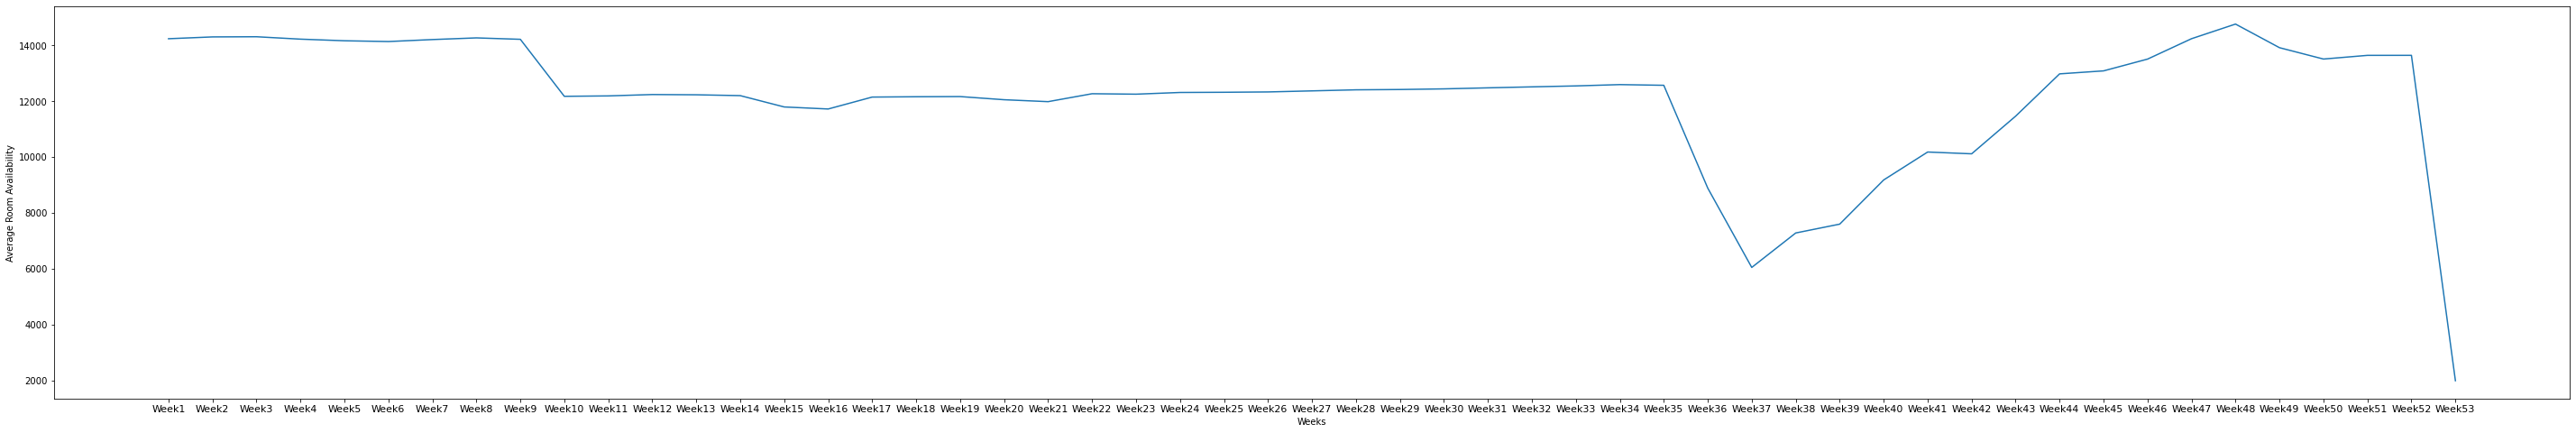

In [51]:
# plotting the number of availabilities in every week of the year.
week_plot = plt.figure()
week_plot.set_figwidth(50)
week_plot.set_figheight(8)
plt.plot(week_dict.keys(),week_dict.values())
plt.xlabel("Weeks")
plt.ylabel("Average Room Availability")
plt.tick_params(axis='x', which='major', labelsize=11)
plt.show()

## We can observe in the plot above that from week 36(1st week of September) to week 42(Mid-October) the availability is least hence we can deduce that it is the busiest time of year and we can increase prices.